## Changing directory to working directory

In [5]:
%cd D:\CAU Kiel\Deep Learning with TensorFlow\Data Sales Prediction Project\Jupyter Notebook\Data

D:\CAU Kiel\Deep Learning with TensorFlow\Data Sales Prediction Project\Jupyter Notebook\Data


# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [3]:
print(tf.__version__)

2.0.0


In [6]:
df = pd.read_csv('umsatzdaten_gekuerzt.csv')
kiwo = pd.read_csv('kiwo.csv')
weather = pd.read_csv('wetter.csv')

In [7]:
len(df)

10869

In [8]:
df.head()

,Datum,Warengruppe,Umsatz
0,2013-07-01,1,148.828353
1,2013-07-02,1,159.793757
2,2013-07-03,1,111.885594
3,2013-07-04,1,168.864941
4,2013-07-05,1,171.280754


# Splitting data into groups

In [8]:
Group_1 = df[df['Warengruppe'] == 1]
Group_2 = df[df['Warengruppe'] == 2]
Group_3 = df[df['Warengruppe'] == 3]
Group_4 = df[df['Warengruppe'] == 4]

# Merging weather data with sales data, on dates

In [9]:
Group_1_merged = Group_1.merge(weather[['Datum','Bewoelkung','Temperatur','Windgeschwindigkeit']])
Group_2_merged = Group_2.merge(weather[['Datum','Bewoelkung','Temperatur','Windgeschwindigkeit']])
Group_3_merged = Group_3.merge(weather[['Datum','Bewoelkung','Temperatur','Windgeschwindigkeit']])
Group_4_merged = Group_4.merge(weather[['Datum','Bewoelkung','Temperatur','Windgeschwindigkeit']])

In [10]:
G1 = Group_1_merged.dropna()
G2 = Group_2_merged.dropna()
G3 = Group_3_merged.dropna()
G4 = Group_4_merged.dropna()


In [11]:
G1['Datum'].head()

0    2013-07-01
1    2013-07-02
2    2013-07-03
3    2013-07-04
4    2013-07-05
Name: Datum, dtype: object

In [13]:
G1['Datum'] = pd.to_datetime(G1['Datum'])
G2['Datum'] = pd.to_datetime(G2['Datum'])
G3['Datum'] = pd.to_datetime(G3['Datum'])
G4['Datum'] = pd.to_datetime(G4['Datum'])

C:\Users\Jibra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
G1.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit
0,2013-07-01,1,148.828353,6.0,17.8375,15
1,2013-07-02,1,159.793757,3.0,17.3125,10
2,2013-07-03,1,111.885594,7.0,21.0750,6
3,2013-07-04,1,168.864941,7.0,18.8500,7
4,2013-07-05,1,171.280754,5.0,19.9750,12


In [15]:
type(G1['Datum'].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
start_date = '07-22-2013'
end_date = '07-30-2013'

In [19]:
mask = (G1['Datum'] >= start_date) & (G1['Datum'] <= end_date)

In [20]:
G1[mask]

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit
21,2013-07-22,1,131.223949,0.0,26.1000,9
22,2013-07-23,1,110.315247,0.0,24.9500,12
23,2013-07-24,1,141.891908,3.0,24.0750,11
24,2013-07-25,1,167.701217,2.0,23.0875,9
25,2013-07-26,1,147.272084,3.0,27.2625,6
26,2013-07-27,1,161.403358,1.0,26.1625,10
27,2013-07-28,1,86.079143,4.0,24.8875,13
28,2013-07-29,1,183.564164,1.0,22.7875,10
29,2013-07-30,1,132.111640,5.0,21.0750,13


In [49]:
G3.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit
0,2013-07-01,3,201.198426,6.0,17.8375,15
1,2013-07-02,3,265.261254,3.0,17.3125,10
2,2013-07-03,3,210.260241,7.0,21.0750,6
3,2013-07-04,3,190.686641,7.0,18.8500,7
4,2013-07-05,3,181.644870,5.0,19.9750,12


In [50]:
G4.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit
0,2013-07-01,4,65.890169,6.0,17.8375,15
1,2013-07-02,4,74.543917,3.0,17.3125,10
2,2013-07-03,4,69.262728,7.0,21.0750,6
3,2013-07-04,4,61.490175,7.0,18.8500,7
4,2013-07-05,4,86.759861,5.0,19.9750,12


In [30]:
Group_1[Group_1['Datum'] == '2013-07-01']

,Datum,Warengruppe,Umsatz
0,2013-07-01,1,148.828353


In [8]:
Group_1.head()

,Datum,Warengruppe,Umsatz
0,2013-07-01,1,148.828353
1,2013-07-02,1,159.793757
2,2013-07-03,1,111.885594
3,2013-07-04,1,168.864941
4,2013-07-05,1,171.280754


In [52]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
       plt.legend(fontsize=14)
    plt.grid(True)

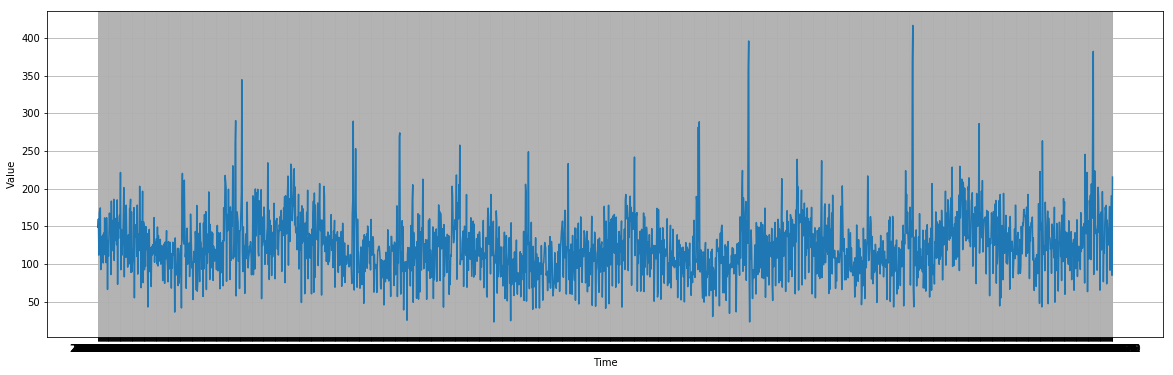

In [53]:
plt.figure(figsize=(20, 6))
plot_series(Group_1['Datum'], Group_1['Umsatz'])
plt.show()

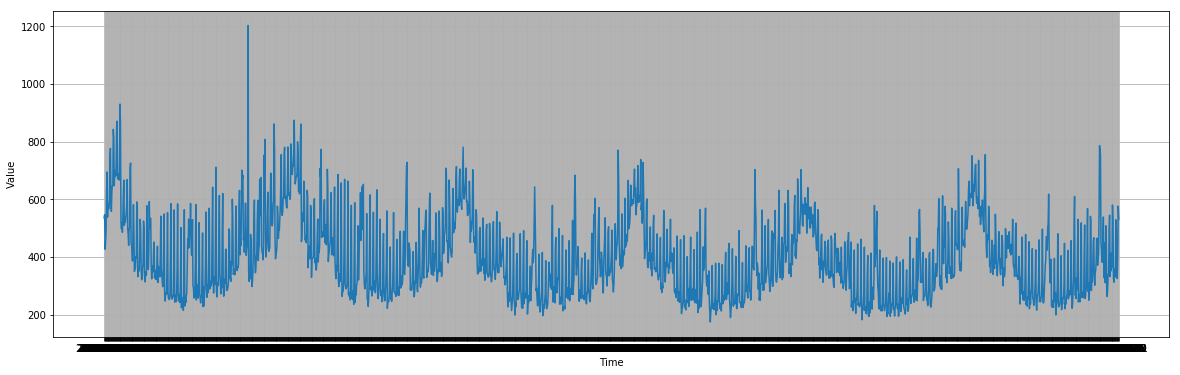

In [54]:
plt.figure(figsize=(20, 6))
plot_series(Group_2['Datum'], Group_2['Umsatz'])
plt.show()

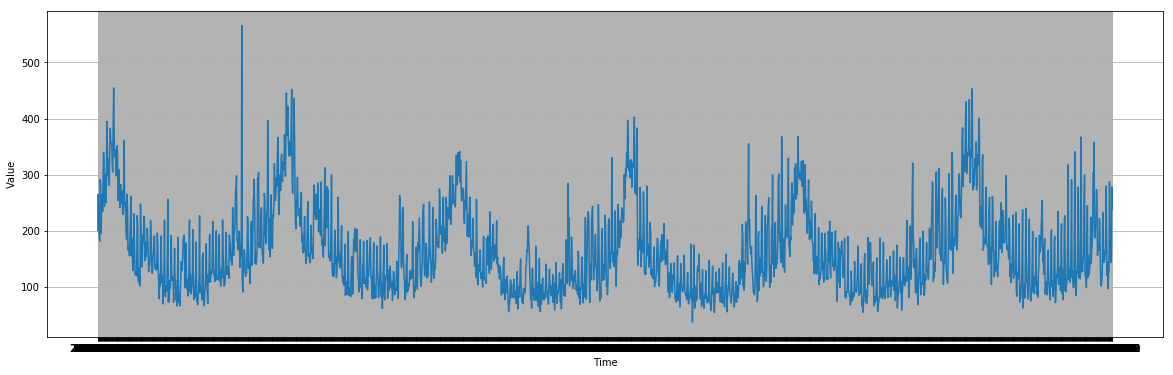

In [12]:
plt.figure(figsize=(20, 6))
plot_series(Group_3['Datum'], Group_3['Umsatz'])
plt.show()

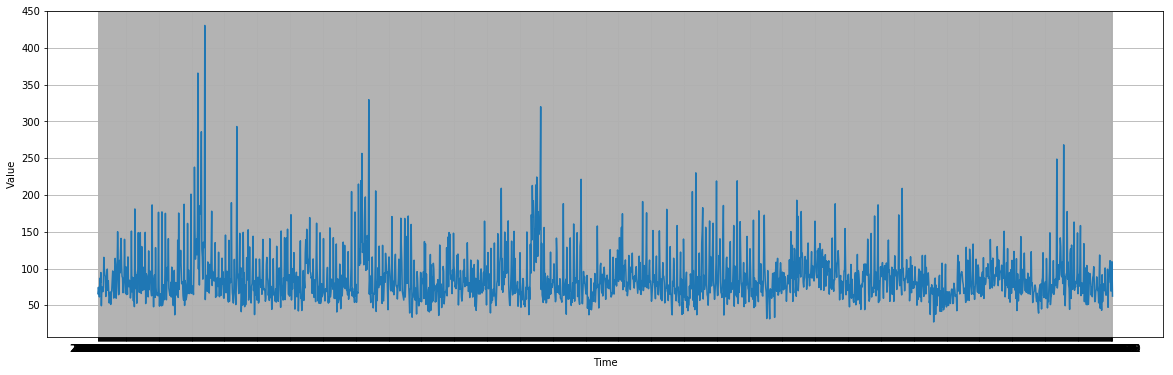

In [13]:
plt.figure(figsize=(20, 6))
plot_series(Group_4['Datum'], Group_4['Umsatz'])
plt.show()